# **1. Dijkstra**

- Thuật toán bắt đầu tại nút mà ta chọn(nút nguồn) và nó phân tích đồ thị để tìm đường đi ngắn nhất giữa nút đó và tất cả các nút khác trong đồ thị
- Thuật toán theo dõi khoảng cách ngắn nhất hiện đã biết từ mỗi nút đến nút nguồn và nó cập nhật các giá trị này nếu nó tìm thấy một đường đi ngắn hơn.
- Khi thuật toán đã tìm ra đường đi ngắn nhất giữa nút nguồn và nút khác, nút đó được đánh dấu là "đã thăm" và được thêm vào đường dẫn
- Quá trình tiếp tục cho đến khi tất cả các nút trong biểu đồ đã được thêm vào đường dẫn. Bằng cách này, chúng ta có một đường dẫn kết nối nút nguồn với tất cả các nút khác theo con đường ngắn nhất có thể để đến mỗi nút.

Ví dụ: Tìm đường đi ngắn nhất từ nút 0 đến các nut còn lại

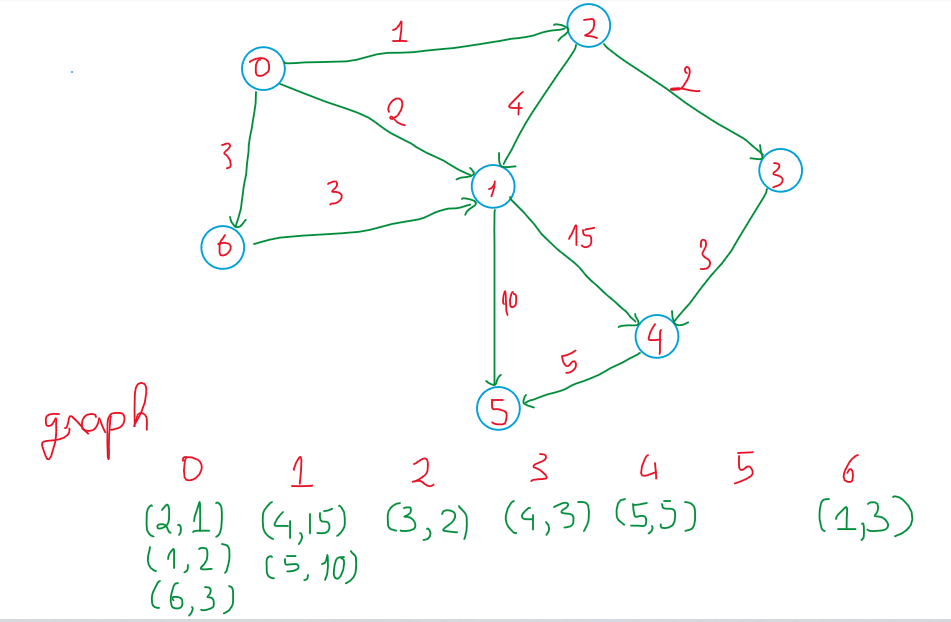

**Giải**

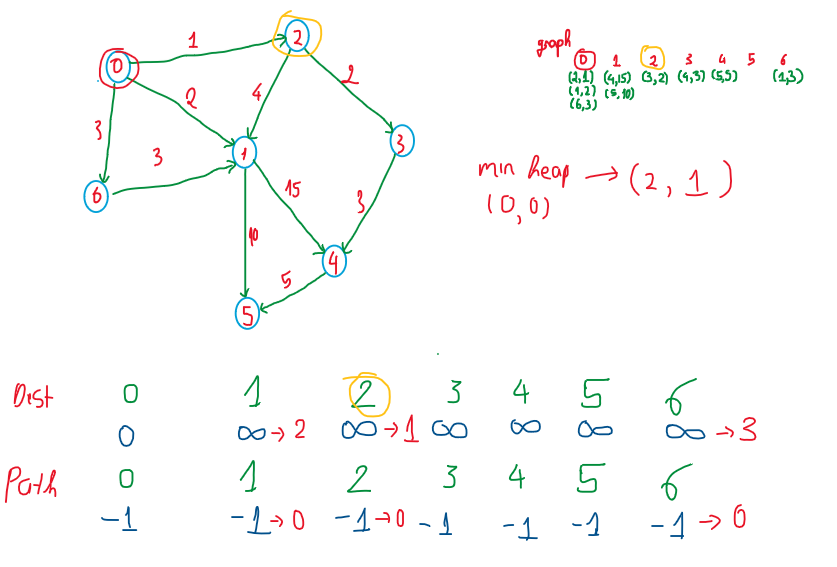

  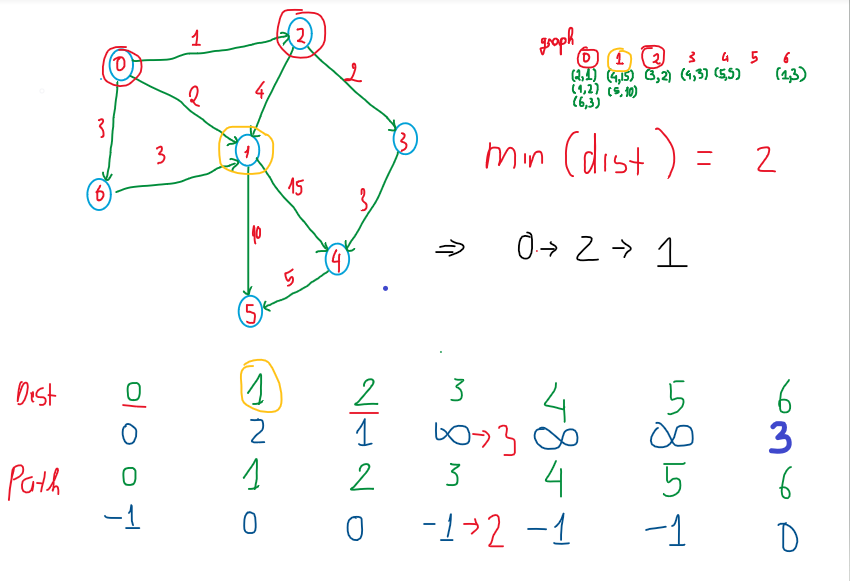

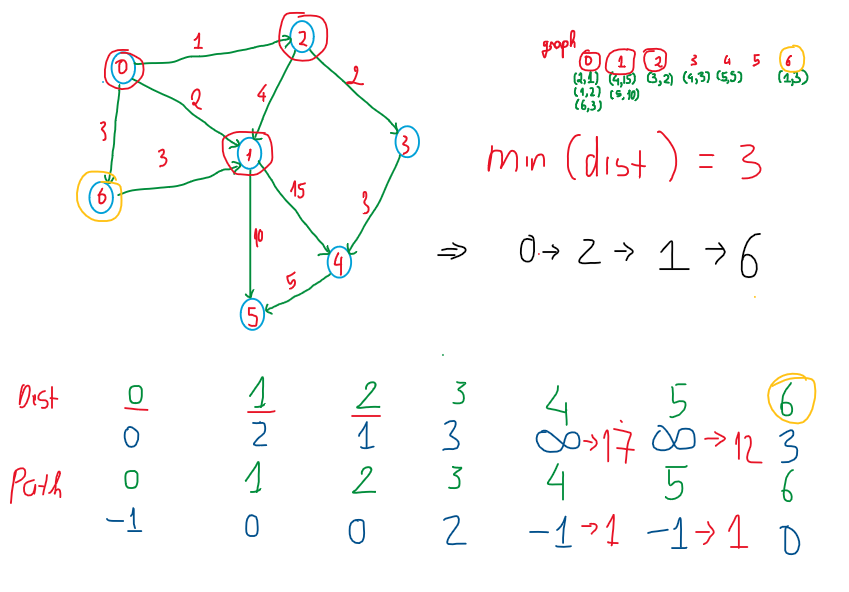

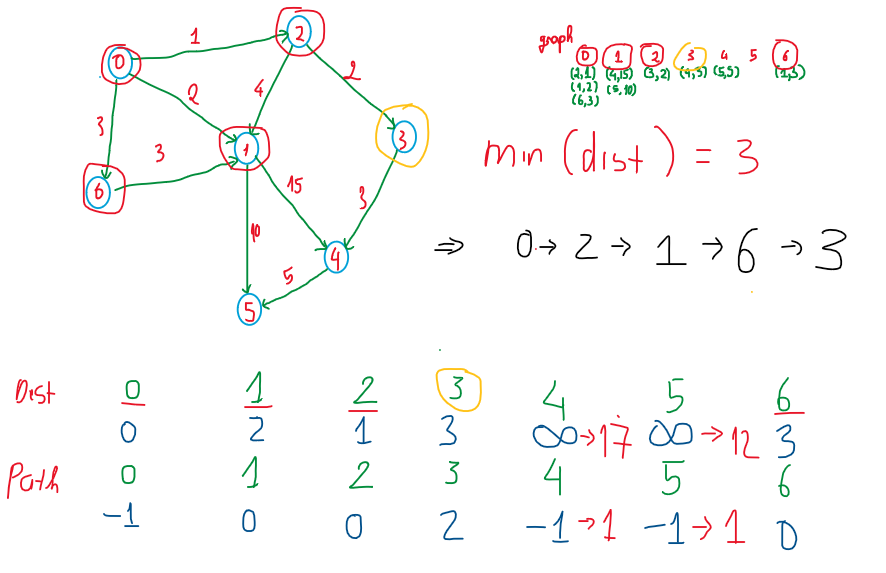

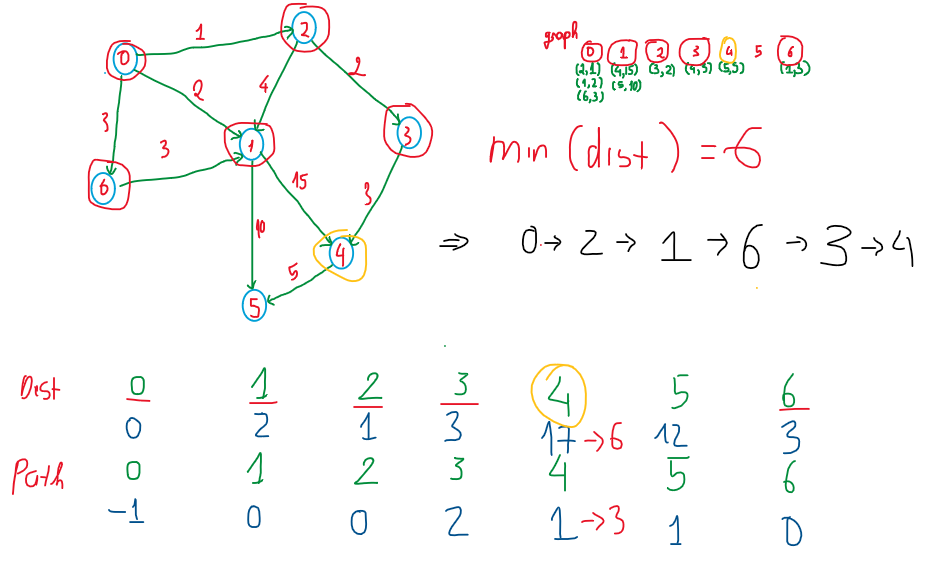

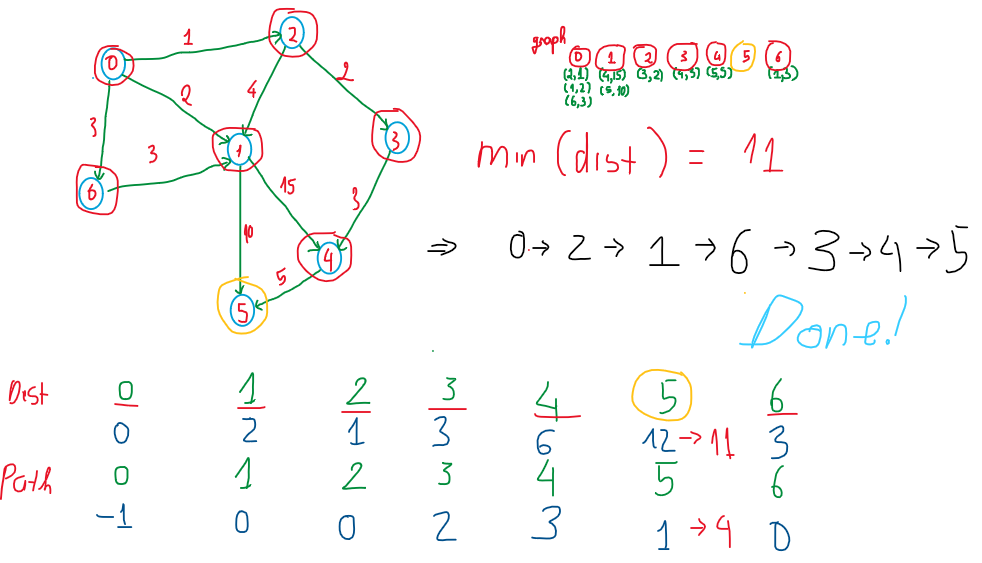

In [ ]:
import collections
import queue

**Danh sách các cạnh**

In [ ]:
N  = 7

In [ ]:
edges = [
    [0, 2, 1],
    [0, 1, 2],
    [0, 6, 3],
    [1, 5, 10],
    [1, 4, 15],
    [2, 1, 4],
    [2, 3, 2],
    [3, 4, 3],
    [4, 5, 5],
    [6, 1, 3]
]

**Khởi tạo graph**

In [ ]:
graph = collections.defaultdict(list)

for edge in edges:
    src, des, weight = edge
    graph[src].append((des, weight))

In [ ]:
graph

defaultdict(list,
            {0: [(2, 1), (1, 2), (6, 3)],
             1: [(5, 10), (4, 15)],
             2: [(1, 4), (3, 2)],
             3: [(4, 3)],
             4: [(5, 5)],
             6: [(1, 3)]})

**Khởi tạo bảng độ dài từ gốc đến một điểm bất ky**

In [ ]:
dist = collections.defaultdict(int)
for i in range(N):
  dist[i] = float('inf')

In [ ]:
dist

defaultdict(int, {0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf})

**Khởi tạo bảng đánh dấu cha của một điểm bất kỳ trên đường đi**

In [ ]:
path = collections.defaultdict(int)
for i in range(N):
  path[i] = -1

In [ ]:
path

defaultdict(int, {0: -1, 1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1})

**Khởi tạo bảng độ dài từ gốc đến một điểm bất kỳ**

In [ ]:
class HeapNode:
  def __init__(self, id, weight):
    self.id = id
    self.weight = weight
  def __lt__(self, other):
    return self.weight <= other.weight

In [ ]:
def dijkstra(src, graph, dist, path):
  minHeap = queue.PriorityQueue()
  dist[src] = 0
  minHeap.put(HeapNode(src, 0))
  while minHeap.qsize() > 0:
    u = minHeap.get()
    for v in graph[u.id]:
      vID, vWeight = v
      # Nếu tìm được đường nhỏ hơn từ gốc đến một điểm bất kỳ thì cập nhật lại độ dài và đường đi
      if u.weight + vWeight < dist[vID]:
        dist[vID] = u.weight + vWeight
        path[vID] = u.id
        minHeap.put(HeapNode(vID, u.weight + vWeight))

In [ ]:
dijkstra(0, graph, dist, path)

In [ ]:
dist

defaultdict(int, {0: 0, 1: 2, 2: 1, 3: 3, 4: 6, 5: 11, 6: 3})

In [ ]:
path

defaultdict(int, {0: -1, 1: 0, 2: 0, 3: 2, 4: 3, 5: 4, 6: 0})

# **2. Linear Search**

Độ phức tạp : O(N)

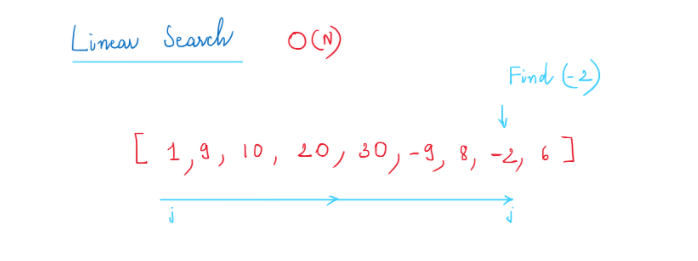

In [ ]:
nums = [1, 9, 10, 20, 30, -9, 8, -2, 6]

In [ ]:
def linearSearch(arr, target):
  for idx in range(len(arr)):
    if arr[idx] == target:
      return idx
  return -1

In [ ]:
linearSearch(nums, 2)

-1

In [ ]:
linearSearch(nums, 20)

3

# **3. Binary Search Tree**

Độ phức tạp:  O(Nlog(N))



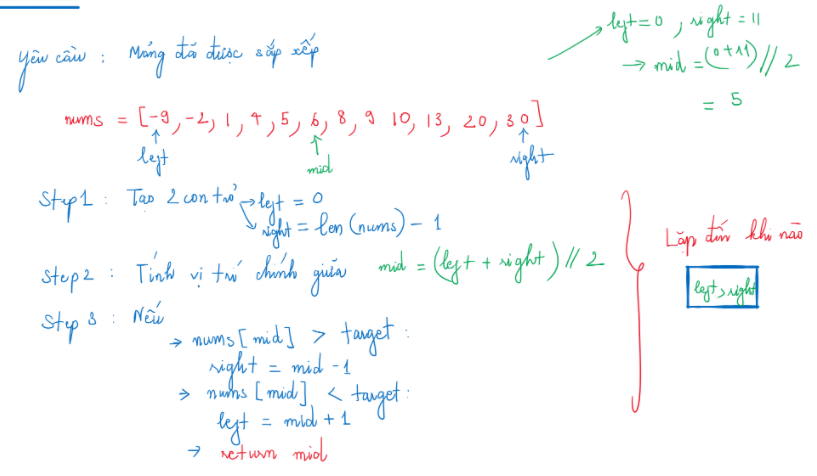

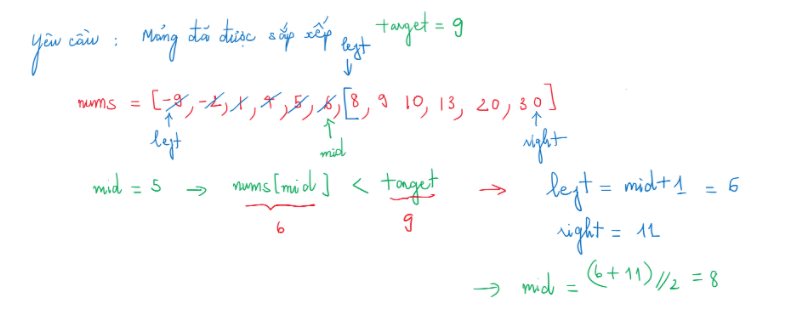

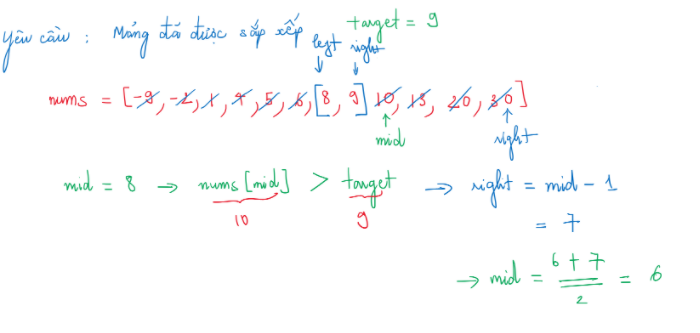

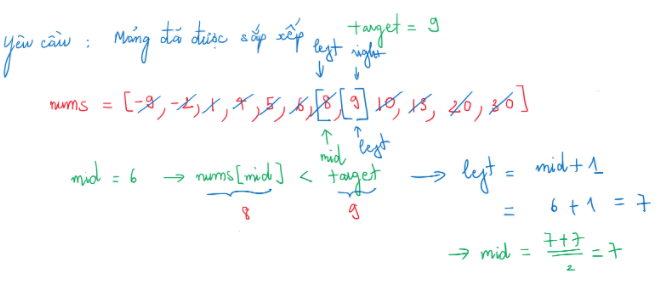

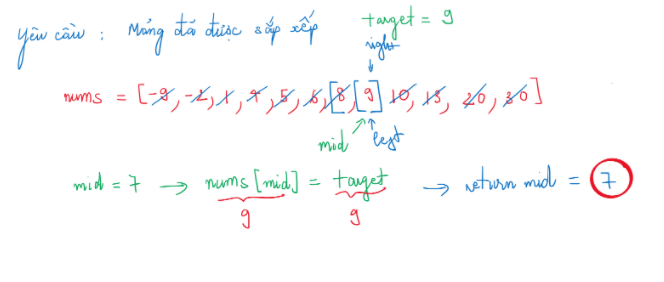

In [ ]:
nums = [1, 9, 10, 20, 30, -9, 8, -2, 6, 5, 13, 4]

In [ ]:
nums.sort()
nums

[-9, -2, 1, 4, 5, 6, 8, 9, 10, 13, 20, 30]

In [ ]:
i = 0 
j = len(nums) - 1
j

11

**Sử dụng vòng lặp**

In [ ]:
def binarySearch(nums, target):
    left = 0
    right = len(nums) - 1
    while left <= right:
        mid = left + (right - left) // 2
        if nums[mid] < target:
            left = mid + 1
        elif nums[mid] > target:
            right = mid - 1
        else:
            return mid
        
    return -1

In [ ]:
binarySearch(nums, 9)

7

**Sử dụng đệ quy**

In [ ]:
def binarySearchWithRecursion(nums, left, right, target):
    if left > right:
        return -1
    mid = left + (right - left) // 2
    if nums[mid] == target: 
        return mid
    elif nums[mid] < target:
        left = mid + 1
    else:
        right = mid - 1
        
    return binarySearchWithRecursion(nums, left, right, target)

In [ ]:
binarySearchWithRecursion(nums, 0, len(nums) - 1, 9)

7

**Tìm phần tử xuất hiện đầu tiên**

In [ ]:
def binarySearchFirstElement(nums, target):
    left = 0
    right = len(nums) - 1
    while left <= right:
        mid = left + (right - left) // 2
        if nums[mid] == target and (mid == left or nums[mid-1] < target):
            return mid
        elif nums[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

In [ ]:
binarySearchFirstElement([1, 1, 1, 2, 2 , 2], 2)

3

**Tìm phần tử xuất hiện cuối cùng**

In [ ]:
def binarySearchLastElement(nums, target):
    left = 0
    right = len(nums) - 1
    while left <= right:
        mid = left + (right - left) // 2
        if nums[mid] == target and (mid == right or target < nums[mid + 1]):
            return mid
        elif nums[mid] > target:
            right = mid - 1
        else:
            left = mid + 1
    return -1

In [ ]:
binarySearchLastElement([1, 1, 1, 2, 2 , 2], 2)

5

# **4. Backtracking**